In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
import TestFunctions

In [29]:
def fit_func(vs):
    # paraboloid with minimum of 0 at (c, d) 
    c, d = -2, 9
    z = (vs[0] - c)**2 + (vs[1] - d)**2 
    
    # unmodal function with minimum of -1 at (pi,pi)
    #z = -np.cos(vs[0]) * np.cos(vs[1]) * np.exp(-((vs[0] - np.pi)**2 + (vs[1] - np.pi)**2))
    
    # ackley function with mininimum of 0 at (0, 0)
    #z = -20.0 * np.exp(-0.2 * np.sqrt(0.5 * (vs[0]**2 + vs[1]**2))) - np.exp(0.5 * (np.cos(2 * np.pi * vs[0]) + np.cos(2 * np.pi * vs[1]))) + np.e + 20
    return z

In [80]:
# implemented from pseudocode in "Handbook of Metaheurestics", with continous variable modifcation as proposed by Patrick Siarry et al.

# fitness function parameters 
dims = 2
lims = [(-1000, 1000, dim) for dim in range(dims)]


# algorithm parameters
iterations = 10000
m = 4 # Max length of tabu list
n_neighbors = 10 # number of neighbors selected for the given poin
h0 = 10000 # inner radius of point

# Initial empty tabu list 
tabu_list = []

# Inital random point
x = np.zeros(dims)
for lim_low, lim_up, dim in lims:
    x[dim] = np.random.uniform(lim_low, lim_up) 

# Best_sol value is also aspiration criteria
best_sol = 10**30
best_point = x

# saving the points for visualization 
points = []

# Iterating through main algorithm 
for i in range(iterations):
    # Find neighbors of current point in each crown neighborhood, except in immediate radius of current point (the inner radius)
    neighbors = []
    # h_prev initially set to inner radius to prevent sampling in this area 
    h_prev = h0
    for _ in range(n_neighbors): 
        # h_current calculated according to isovolume partitioning formula
        h_current = (h_prev**dims - h_prev**dims / n_neighbors)**(1 / n_neighbors)
        
        # Keep drawing in crown neighborhood until a point not covered in tabu or meeting aspiration criteria selected
        point_selected = False
        draws = 0
        while not point_selected: 
            # Draw neighbor from specificed crown neigborhood
            u = np.random.normal(0, 1, dims)
            u = (1 / np.linalg.norm(u)) * u
            neighbor = np.random.uniform(low = h_prev, high = h_prev + h_current) * u + x
            
            # Compute if point in any tabu area
            tabu = [np.linalg.norm(tabu_point - neighbor) < h0 for tabu_point in tabu_list]
       
            # Select point if not in any tabu area or if it meets aspiration criteria
            if (not any(tabu)) or fit_func(neighbor) < best_sol:
                point_selected = True
                neighbors.append(neighbor)
            
            draws += 1
            # if no value found after 5 draws stop drawing
            if draws == 5:
                break
        
        # set new h_prev 
        h_prev += h_current 
    
    # compute the best neighbor
    neighbors_fit = [fit_func(neighbor) for neighbor in neighbors]
    index_best_neighbor = neighbors_fit.index(min(neighbors_fit))
    best_neighbor = neighbors[index_best_neighbor]
    
    # add best neighbor to tabu list and set it as current point
    tabu_list.append(best_neighbor)
    x = best_neighbor
    
    # remove first value in tabu list if overflow
    if len(tabu_list) > m: 
            tabu_list.pop(0)
        
    # set new best solution if fitness of x better than previous best
    if fit_func(x) < best_sol:
        best_sol = fit_func(x)
        best_pos = x

    points.append(x) # For visualization
    
print("The best position: ", best_pos)
print("Value at best position: ", best_sol)

The best position:  [-52.43446507  32.9427093 ]
Value at best position:  3116.8885953993376


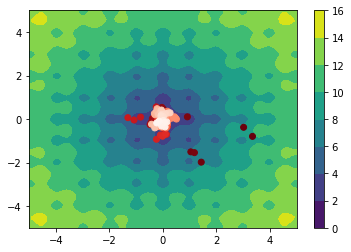

In [4]:
back_x = np.linspace(-5, 5, 100)
back_y = np.linspace(-5, 5, 100)

X, Y = np.meshgrid(back_x, back_y)
Z = fit_func([X, Y])

plt.contourf(X, Y, Z, cmap='viridis');
plt.colorbar();

duration = 100
x = [point[0] for point in points[-duration:]]
y = [point[1] for point in points[-duration:]]
plt.scatter(x, y, c = [range(duration)], cmap = "Reds_r")
plt.show()

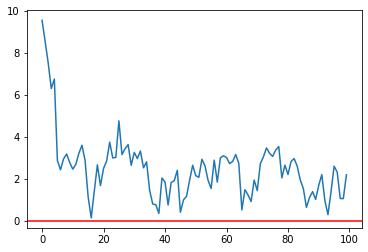

In [5]:
# fitness for points in each iteration
fitness_vals = [fit_func(x) for x in points]
plt.plot(fitness_vals)
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

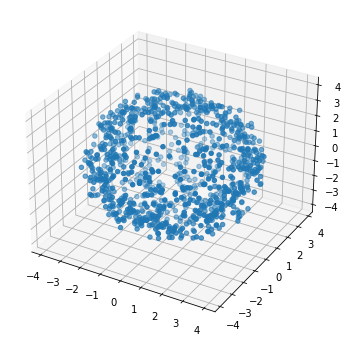

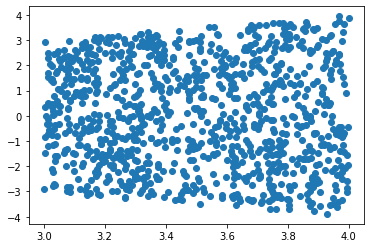

(array([ 99., 103., 118., 110.,  73.,  82.,  99., 125.,  95.,  96.]),
 array([3.00168565, 3.10143844, 3.20119123, 3.30094402, 3.40069681,
        3.5004496 , 3.60020239, 3.69995518, 3.79970796, 3.89946075,
        3.99921354]),
 <BarContainer object of 10 artists>)

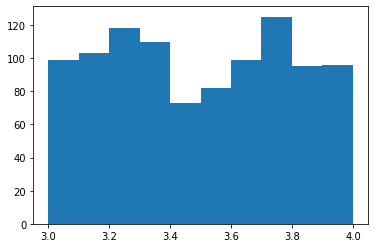

In [6]:
### Testing n-ball sampling method
d = 3
radius = 3 
plot_x = []
plot_y = []
plot_z = []
for i in range(1000):
    u = np.random.normal(0, 1, d)
    norm = np.linalg.norm(u)
    x = (1/norm) * u # point on unit n-sphere
    x = np.random.uniform(low = 3, high = 4) * x# point in unit n-ball
    plot_x.append(x[0])
    plot_y.append(x[1])
    plot_z.append(x[2])


fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(projection='3d')

ax.scatter(plot_x, plot_y, plot_z)
plt.show()

h = [np.linalg.norm([x,y,z]) for x,y,z in zip(plot_x, plot_y, plot_z)]
plt.scatter(h, plot_x)
plt.show()

plt.hist(h)



10